In [9]:
import os
import re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

data_set = tf.keras.utils.get_file(
    fname='imdb.tar.gz',
    origin = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
    extract = True
)

84125825/84125825 [==============================] - 26s 0us/step


## 판다스로 데이터를 불러오면 쉽게 데이터 분석 과정을 진행할 수 있지만 풀린데이터를 보면 txt 형태여서 
## 데이터 프레임으로 만들기 위한 변환 작업이 필요하다.

### 하나는 각 파일에서 리뷰 텍스트를 불러오는 함수이다.
### 다른 하나는 각 리뷰에 해당하는 라벨값을 가져오는 함수다.

In [29]:
def directory_data(directory):
  data = {}
  data['review'] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), 'r') as file:
      data['review'].append(file.read())

  return pd.DataFrame.from_dict(data)

In [30]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, 'pos'))
    neg_df = directory_data(os.path.join(directory, 'neg'))
    pos_df['sentiment']=1
    neg_df['sentiment']=0

    return pd.concat([pos_df,neg_df])

In [31]:
train_df = data(os.path.join(os.path.dirname(data_set),'aclImdb','train'))
test_df = data(os.path.join(os.path.dirname(data_set),'aclImdb','test'))

In [32]:
train_df.head()

,review,sentiment
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1


In [33]:
reviews = list(train_df['review'])


In [34]:
# 문자열 문장 리스트를 토크나이즈
tokenized_reviews = [r.split() for r in reviews]

In [35]:
# 토크나이즈 된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]


In [36]:
# 토크나이즈 된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

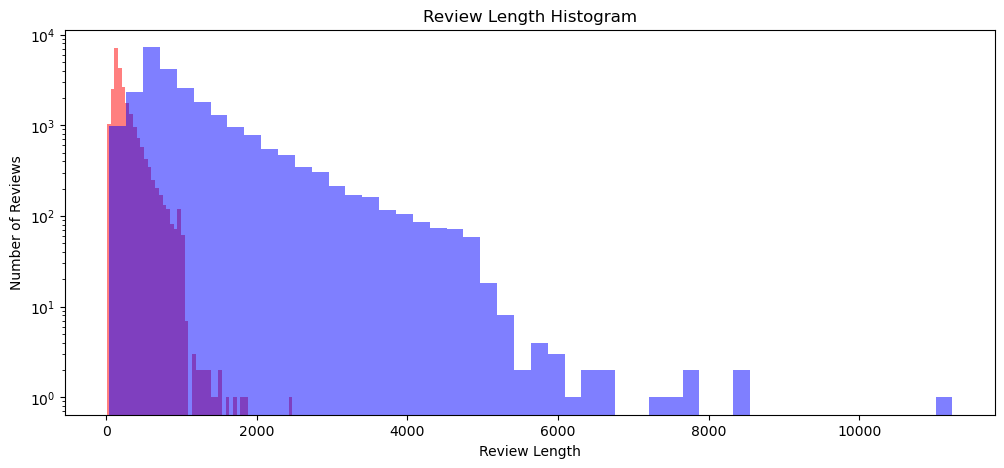

In [37]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log')
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

In [38]:
import numpy as np

print("문장 최대 길이: {}".format(np.max(review_len_by_token)))
print("문장 최소 길이: {}".format(np.min(review_len_by_token)))
print("문장 평균 길이: {:.2f}".format(np.mean(review_len_by_token)))
print("문장 길이 표준편차: {:.2f}".format(np.std(review_len_by_token)))
print("문장 중간 길이: {}".format(np.median(review_len_by_token)))

print("제1사분위 길이: {}".format(np.percentile(review_len_by_token, 25)))
print("제3사분위 길이: {}".format(np.percentile(review_len_by_token, 75)))

문장 최대 길이: 2470
문장 최소 길이: 10
문장 평균 길이: 233.79
문장 길이 표준편차: 173.73
문장 중간 길이: 174.0
제1사분위 길이: 127.0
제3사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x296af2a30>,
 'caps': [<matplotlib.lines.Line2D at 0x296af2eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x296af2760>],
 'medians': [<matplotlib.lines.Line2D at 0x297ad6490>],
 'fliers': [<matplotlib.lines.Line2D at 0x297ad6a30>],
 'means': [<matplotlib.lines.Line2D at 0x297ad6760>]}

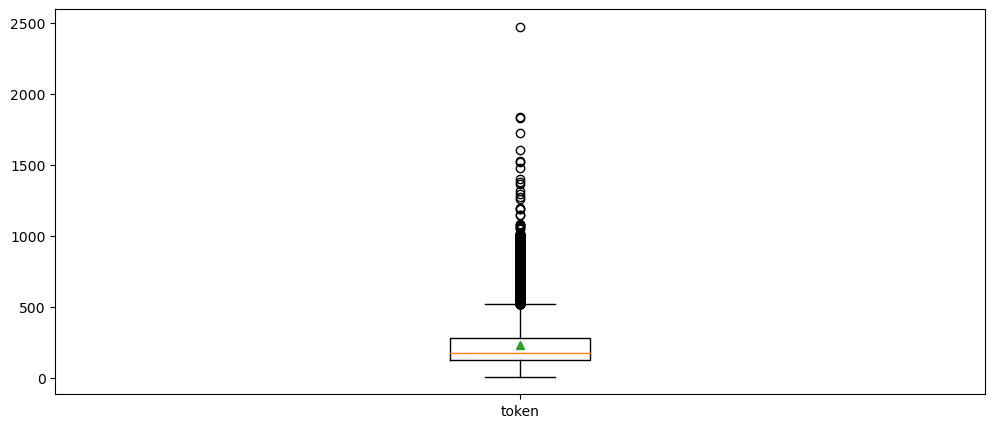

In [39]:
plt.figure(figsize = (12, 5))
plt.boxplot([review_len_by_token], labels = ['token'], showmeans = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x297b90ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x297ba0280>,
 'boxes': [<matplotlib.lines.Line2D at 0x297b90af0>],
 'medians': [<matplotlib.lines.Line2D at 0x297ba0820>],
 'fliers': [<matplotlib.lines.Line2D at 0x297ba0dc0>],
 'means': [<matplotlib.lines.Line2D at 0x297ba0af0>]}

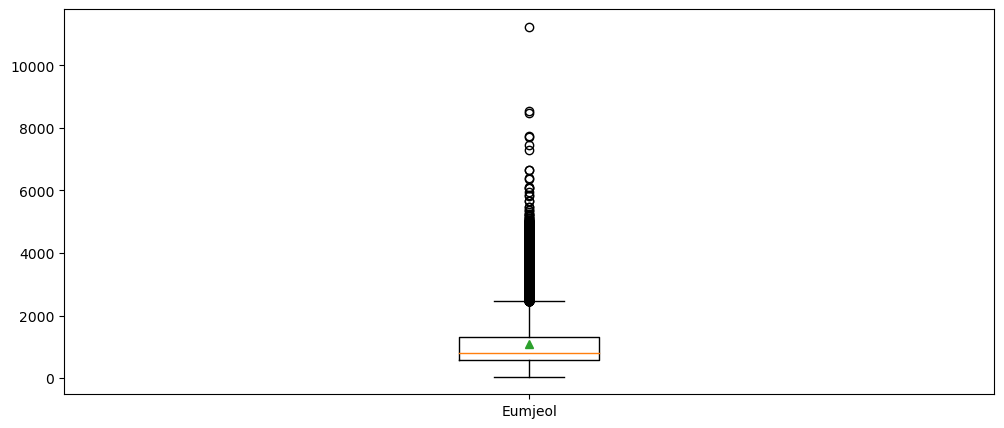

In [40]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

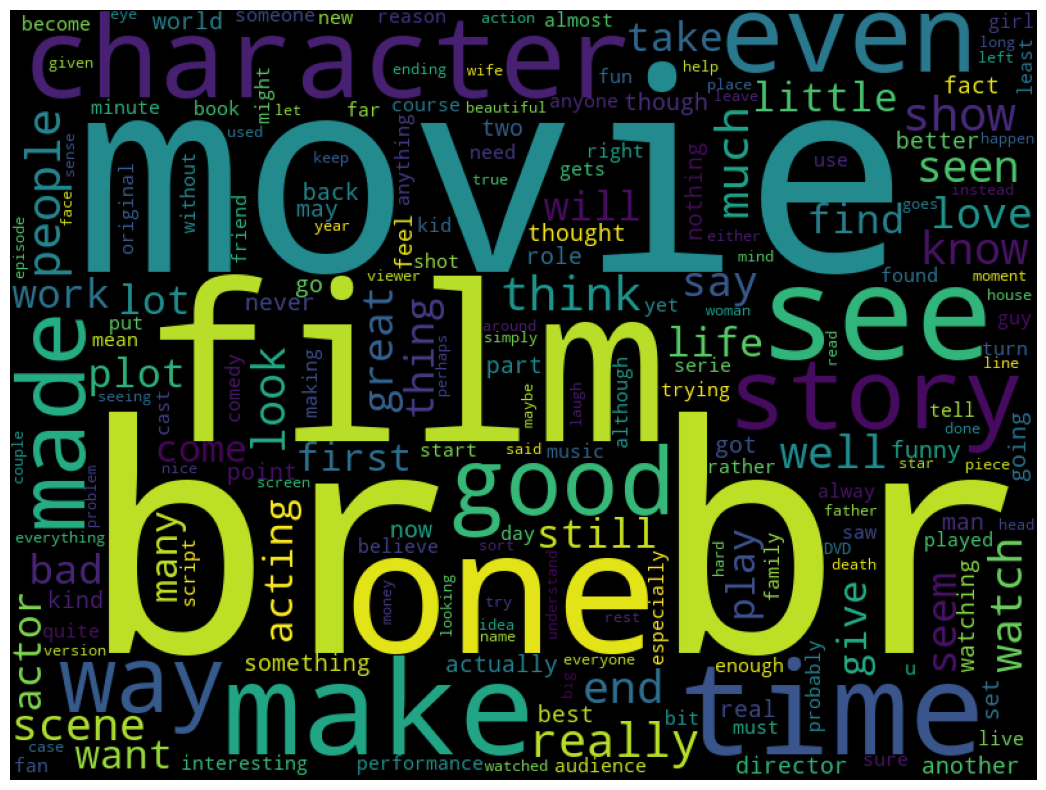

In [41]:
#워드클라우드 만들기

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

1    12500
0    12500
Name: sentiment, dtype: int64


<AxesSubplot:xlabel='sentiment', ylabel='count'>

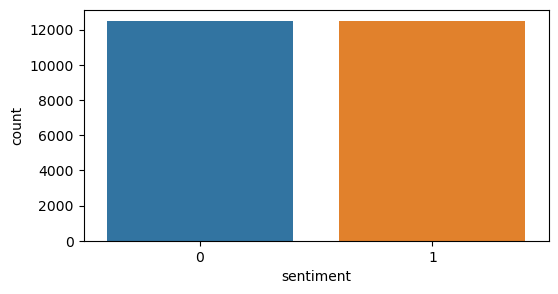

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
print(sentiment)
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x=train_df['sentiment'])